<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/CDA_TimeSeries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Séries Temporais com ARIMA

In [129]:
#@markdown imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm

import itertools

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import periodogram


# ARIMA Modelo de Média Móvel Integrada Autoregressiva 

Aqui você vai aprender um dos modelos estatísticos de previsão de Séries Temporais mais empregados e que dará para você base para explorar modelos ainda mais sofisticados com o ARIMAX, SARIMAX, VARIMAX, variantes desse modelo. Mas antes precisamos aprender o que é um modelo autoregressivo, o que são médias móveis etc.


## Dados

Os casos de maior interesse são, como você pode imaginar, a previsão de Séries não estacionárias. Vamos empregar nossa Série de Dados sobre voos. 

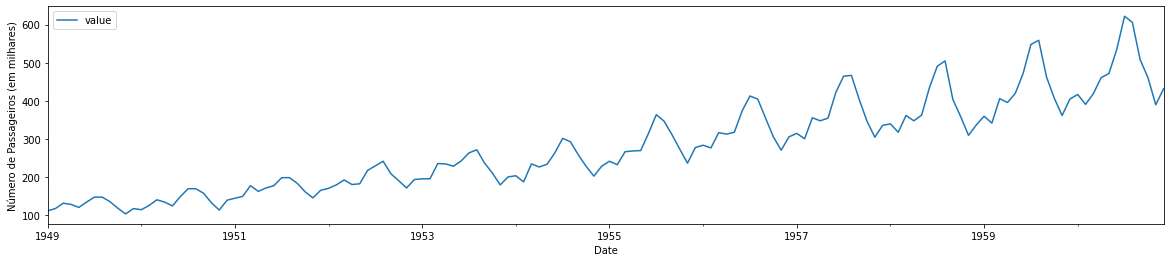

,value
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [130]:
df = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv')
df.rename(columns={'date':'Month'},inplace=True)

df['Month']=pd.to_datetime(df['Month'], format='%Y-%m-%d')
df.set_index(['Month'], inplace=True)

plt.figure(figsize=(20,4))
ax = plt.gca()

df.plot(ax=ax)
plt.ylabel('Número de Passageiros (em milhares)')
plt.xlabel('Date')
plt.show()

display(df.head())



## Não Estacionariedade

Como vimos essa Série é **não estacionária** pois suas estatísticas variam ao longo do tempo. Você pode observar isso ou ainda aplicar o **teste ADF** para verificar a não estacionariedade. 

In [131]:
#@markdown plot_series
def plot_series(values, decomp_type='additive', max_lags=30):
  #
  # values = a pandas series with datetime index
  #
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline 
  import seaborn as sns
  import statsmodels.formula.api as sm

  from statsmodels.graphics.tsaplots import plot_acf
  from statsmodels.graphics.tsaplots import plot_pacf
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.seasonal import seasonal_decompose
  from statsmodels.tsa.stattools import periodogram

  from pylab import rcParams
  rcParams['figure.figsize'] = 17,3

  plt.plot(values.index, values, c='r')
  plt.title('Original | Observed Series')
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)

  decomposition = seasonal_decompose(values, model=decomp_type)

  ax[0].plot(decomposition.trend)
  ax[0].set_title('Trend')
  ax[1].plot(decomposition.seasonal)
  ax[1].set_title('Seasonal')
  ax[2].plot(decomposition.resid)
  ax[2].set_title('Residuals')

  plt.tight_layout()
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3)

  plot_acf(values, ax=ax[0], lags = max_lags)
  plot_pacf(values, ax=ax[1], lags = max_lags)

  periods = periodogram(values)
  # print(periods)
  ax[2].bar(x=range(len(periods)), height=periods)
  plt.title('Periodogram')

  plt.tight_layout()
  plt.show()

  warnings.filterwarnings('once')

  return 




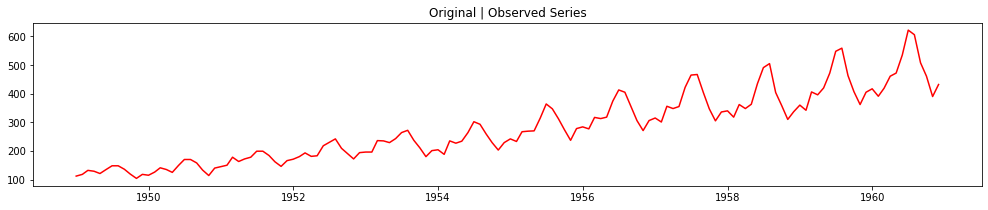

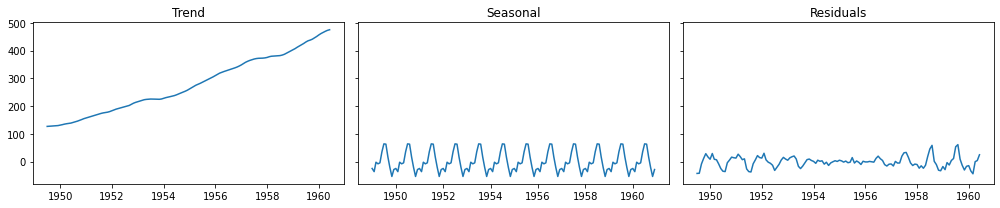

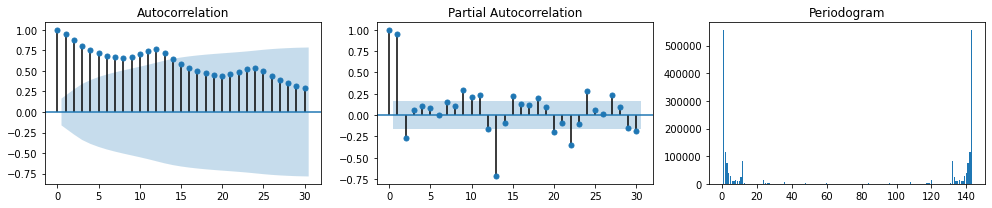

In [132]:
plot_series(df['value'])  

In [133]:
def isSeriesStationary(series):
  pValue = adfuller(series)[1]
  if pValue > 0.05:
      return False
  else:
      return True

isSeriesStationary(df['value'])  

False

# Médias Móveis

Em estatística, uma média móvel é um cálculo usado para analisar pontos de dados criando uma série de médias de diferentes subconjuntos do conjunto de dados completo. 

Em finanças, por exemplo, uma média móvel (MA) é um indicador de ações comumente usado em análise técnica . A razão para calcular a média móvel de uma ação é ajudar a suavizar os dados de preço criando um preço médio constantemente atualizado. Ao calcular a média móvel, os impactos de flutuações aleatórias de curto prazo no preço de uma ação em um período de tempo especificado são mitigados.

Você também deve ter ouvido esse termo várias vezes sobre a evolução dos casos de Covid nos anos de 2020 e 2021.

Com Séries Temporiais no Pandas Python você pode empregar a função `rolling()` para obter médias dos valores ou outras estatísticas para uma *janela* de dados.

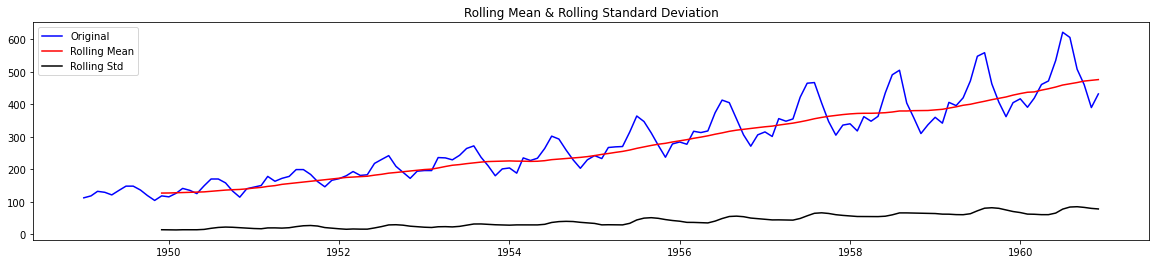

In [134]:
plt.figure(figsize=(20,4))
ax = plt.gca()

rolling_mean = df.rolling(window = 12).mean() 
rolling_std = df.rolling(window = 12).std()

plt.plot(df, color = 'blue', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.show()

A série acima, que considera médias de 12 meses, faz mas sentido que as médias de 3 meses (abaixo), pois produz uma *suavização* maior da Série de Dados. 

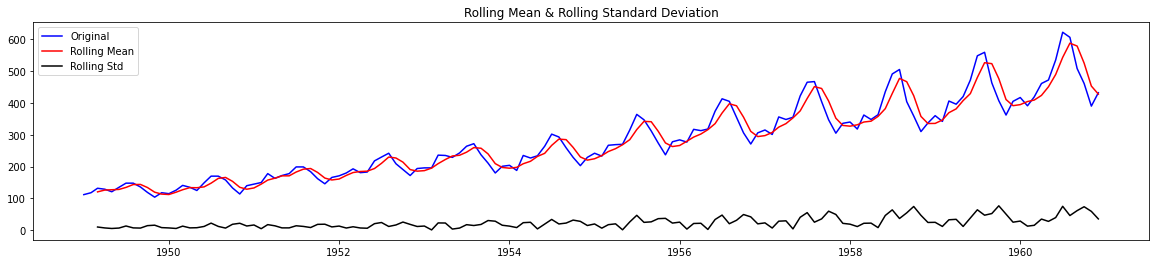

In [135]:
plt.figure(figsize=(20,4))
ax = plt.gca()

rolling_mean = df.rolling(window = 3).mean() 
rolling_std = df.rolling(window = 3).std()

plt.plot(df, color = 'blue', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.show()

# Transformação `log()`

Outra transformação útil para simplificar (*estacionar*) séries de dados é a aplicação do `log()`.

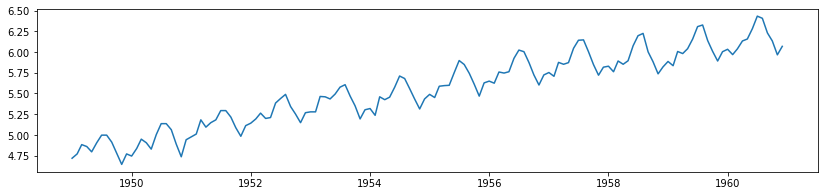

In [136]:
df_log = np.log(df) 
plt.plot(df_log)
plt.show()

Você pode notar que a estatística de `std()` aparece mais uniforme na série de valores transformados `log()`.

# Combinando Médias Móveis e `log()`

Podemos agora combinar essas duas transformações subtraindo a média (do log!). 

In [137]:
rolling_mean = df_log.rolling(window=12).mean() 
df_log_minus_mean = df_log - rolling_mean 
df_log_minus_mean.dropna(inplace=True)

Nossa série agora é claramente estacionária.

In [138]:
isSeriesStationary(df_log_minus_mean['value'])

True

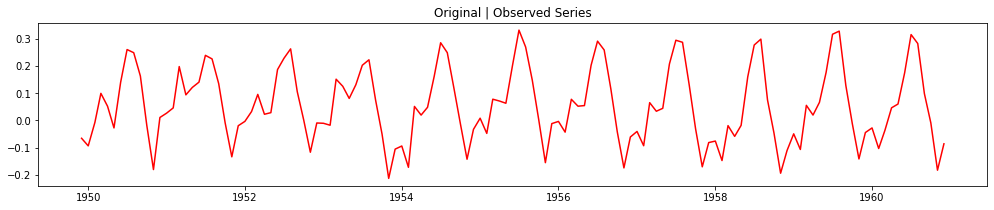

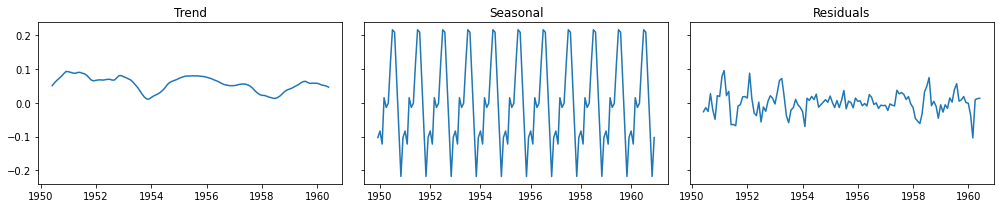

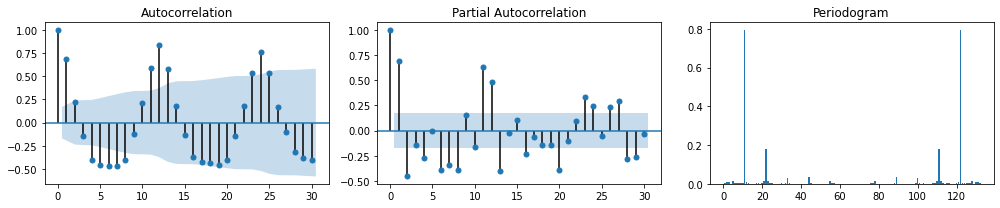

In [139]:
plot_series(df_log_minus_mean['value'])  

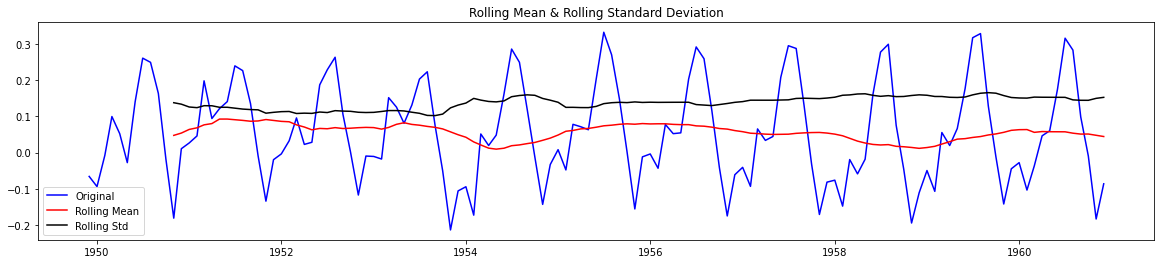

In [140]:
plt.figure(figsize=(20,4))
ax = plt.gca()

rolling_mean = df_log_minus_mean.rolling(window = 12).mean() 
rolling_std = df_log_minus_mean.rolling(window = 12).std()

plt.plot(df_log_minus_mean, color = 'blue', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.show()

# Aplicando Diferenças

Uma outra transformação útil é a aplicação de diferenças que já empregamos na aula anterior.

In [141]:
df_log_shift = df_log - df_log.shift() 
df_log_shift.dropna(inplace=True)


Embora o teste não retorne positivo (você pode consultar os valores do teste), a série produzida é claramente mais estacionária que a série original, embora a subtração de médias tenha tido um efeito e produzido um modelo melhor (mais estacionário).

In [142]:
isSeriesStationary(df_log_shift['value'])

False

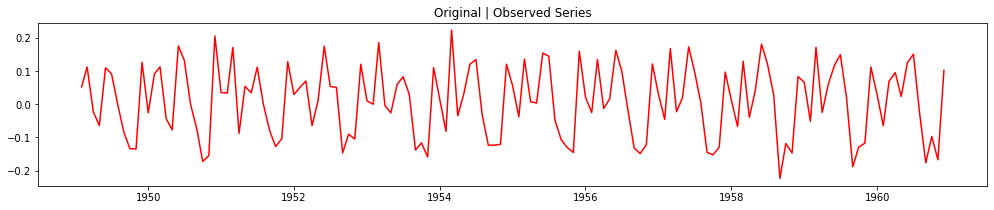

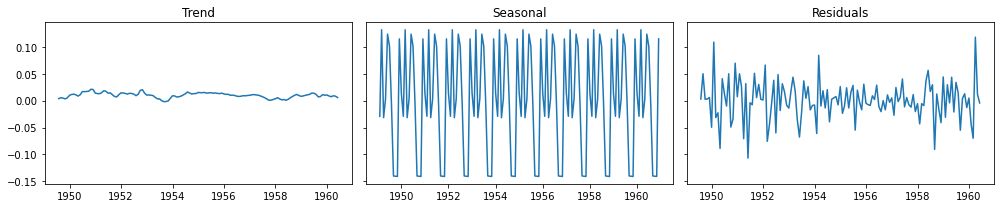

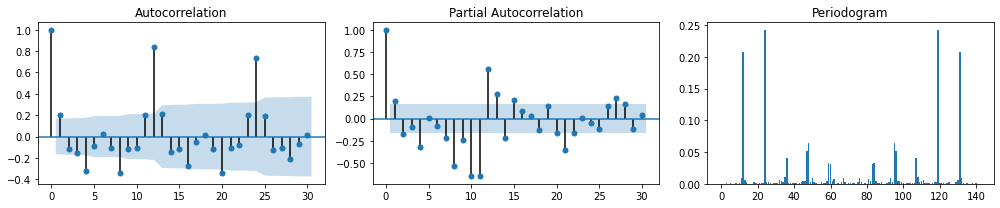

In [143]:
plot_series(df_log_shift['value'])  

## Combinando log, shift e médias móveis

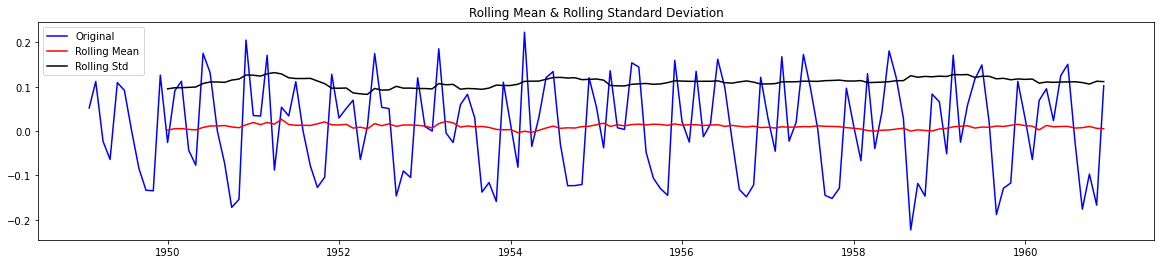

In [144]:
plt.figure(figsize=(20,4))
ax = plt.gca()

rolling_mean = df_log_shift.rolling(window = 12).mean() 
rolling_std = df_log_shift.rolling(window = 12).std()

plt.plot(df_log_shift, color = 'blue', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.show()

In [145]:
rolling_mean.head(20)

,value
Month,
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN
1949-10-01,NaN


Mas afinal, qual a teoria por traz desses modelos?

# Modelo AutoRegressivo (AR)

Os modelos autorregressivos operam sob a premissa de que os valores passados ​​afetam os valores atuais. Os modelos AR são muito comuns em diversas séries temporiais de processos naturais, economia e outros. São como a 'distribuição normal' das Séries Temporais. Sendo válida, podemos construir um modelo de regressão linear que tente prever o valor de uma variável dependente nos períodos anteriores.

$$ y_t = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \dots +  \beta_p y_{t-p} $$

A **ordem do modelo autoregressivo** corresponde ao número de intervalos ou períodos de tempo empregados $p$.

# Modelo de Média Móvel (MA)

Assume que o valor da variável dependente atual depende dos termos de erro dos períodos anteriores sendo expresso como:

$$ y_t = \epsilon_0 + \alpha_1 \epsilon_{t-1} + \alpha_2 \epsilon_{t-2} + \dots + \alpha_q \epsilon_{t-q} $$

A **ordem do modelo de médias móveis** corresponde ao número de intervalos ou períodos de tempo empregados $q$. Para entendermos por que esse modelo é um modelo de médias móveis você pode ver que o mesmo modelo pode ser expresso desse modo:

$$ y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} $$


Onde $\mu$ é a média da série.

# Média Móvel Regressiva Automática (ARMA)

O modelo Média Móvel Regressiva Automática (ARMA) assume simplesmente uma combinação dos dois modelos para a previsão da série de dados:

$$ y_t = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \dots +   \beta_n y_{t-n} + \epsilon_0 + \alpha_1 \epsilon_{t-1} + \alpha_2 \epsilon_{t-2} + \dots + \alpha_q \epsilon_{t-q} $$

# Modelo de Média Móvel Integrada Autoregressiva (ARIMA(p, d, q))

O modelo ARIMA (também conhecido como Box-Jenkins) adiciona **diferenciação** a um modelo ARMA. A diferenciação subtrai o valor atual de valores anteriores e é empregado para transformar uma série temporal em uma série estacionária. Por exemplo, a diferenciação de primeira ordem aborda tendências lineares e emprega a transformação 

$$z_t = y_t - y_{t-1}$$

A diferenciação de segunda ordem aborda tendências quadráticas e emprega uma diferença de primeira ordem de uma diferença de segunda  ordem, e assim por diante.

$$z_t = ( y_t - y_{t-1} ) -  ( y_{t-1} - y_{t-2} ) - \dots$$

Desse modo três parâmetros inteiros (p, d, q) são normalmente usados ​​para parametrizar modelos ARIMA:

* **p**: número de termos autorregressivos (ordem AR)
* **d**: número de diferenças não sazonais (ordem diferencial)
* **q**: número de termos de média móvel (ordem MA)

# Função de Auto Correlação (ACF) $\rightarrow MA \rightarrow q$

Auto Correlação (ACF) é a correlação entre as observações no momento atual e as observações em todos os momentos anteriores . Podemos usar ACF para determinar o número ideal de termos MA . O número de termos determina a ordem do modelo.

# Função de Auto Correlação Parcial (PACF) $\rightarrow AR \rightarrow p$

Auto Correlação Parcial (PACF) é um subconjunto de ACF. O PACF expressa a correlação entre as observações feitas em dois pontos no tempo , considerando qualquer influência de outros pontos de dados. Podemos usar o PACF para determinar o número ideal de termos a serem usados ​​no modelo AR . O número de termos determina a ordem do modelo.

# Caso: **ARIMA para o caso de previsão de voos** 



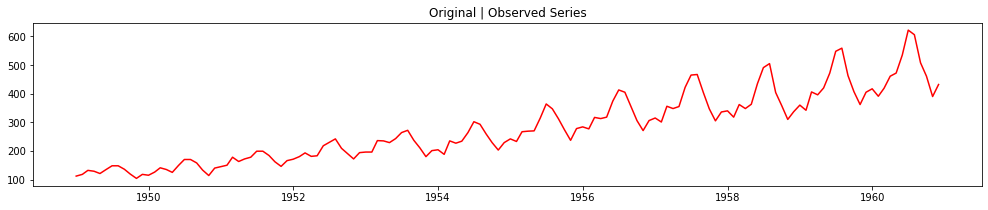

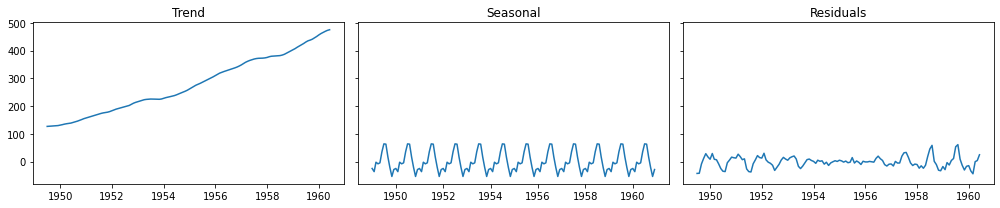

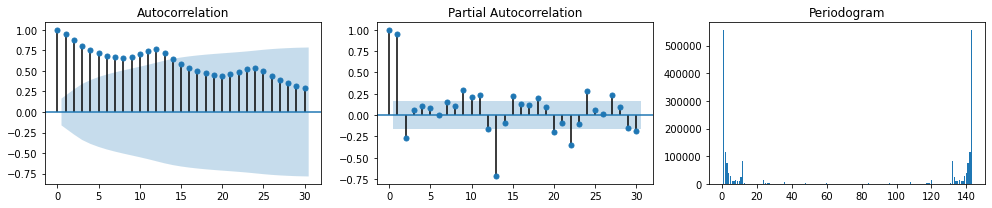

In [146]:
plot_series(df['value'])  

No nosso exemplo podemos, por exemplo, experimentar os seguintes valores com base nos gráficos acima.

* **p**: $2$, de PACF (ordem AR) 
* **d**: $1$, número de diferenças não sazonais (ordem diferencial)
* **q**: $10$, de ACF (ordem MA)  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


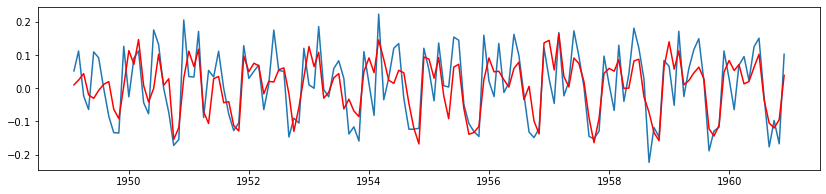

In [147]:
from statsmodels.tsa.arima_model import ARIMA

decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,10))
results = model.fit(disp=-1)

plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
plt.show()

E obtemos as seguintes previsões.

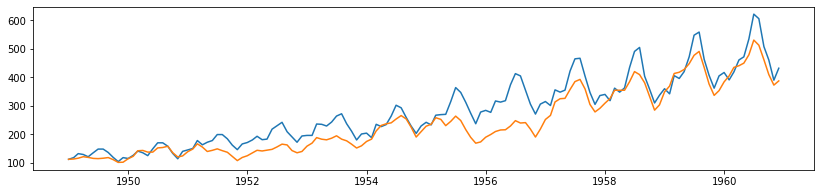

In [148]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['value'].iloc[0], index=df_log.index)

predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.plot(df)
plt.plot(predictions_ARIMA)
plt.show()

Para prevermos 3 anos a frente (36 meses), podemos então fazer,

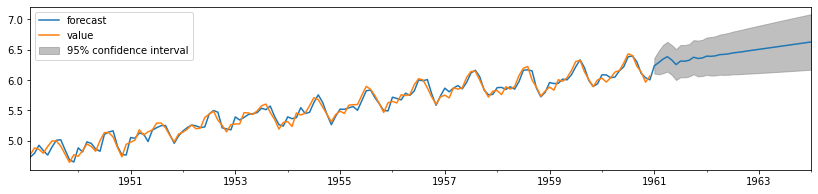

In [149]:
results.plot_predict(1,12*12 + 36)
plt.show()

Uma vez que a base já possui 12 anos (12*12 meses) de dados.

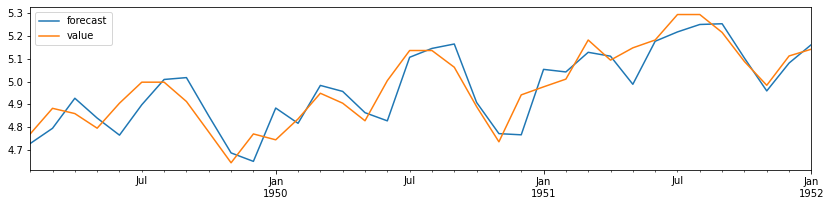

In [150]:
results.plot_predict(1,36)
plt.show()

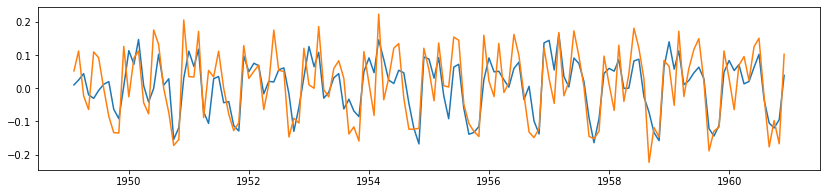

In [151]:
plt.plot(results.fittedvalues)
# plt.plot(df_log.value)
# plt.plot(df_log_minus_mean.value) 
plt.plot(df_log_shift.value)
plt.show()

Várias métricas podem ser analisadas e o Log Likelihood, AIC e BIC são frequentemente as métricas mais empregadas.

In [152]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  143
Model:                ARIMA(2, 1, 10)   Log Likelihood                 177.575
Method:                       css-mle   S.D. of innovations              0.065
Date:                Mon, 18 Apr 2022   AIC                           -327.150
Time:                        22:21:13   BIC                           -285.671
Sample:                    02-01-1949   HQIC                          -310.295
                         - 12-01-1960                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0102      0.003      3.534      0.001       0.005       0.016
ar.L1.D.value     -0.7031      0.110     -6.408      0.000      -0.918      -0.488
ar.L2.D.value     -0.5890      0.089

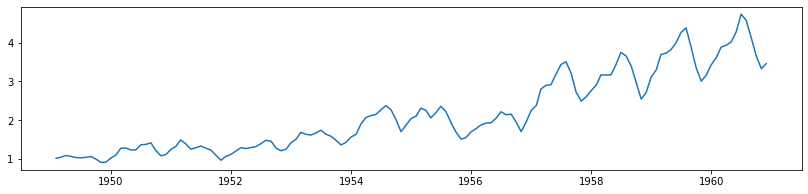

In [154]:
results.predict(dynamic=True)
plt.plot(np.exp(results.predict().cumsum()))
plt.show()

A escolha desses parâmetros, entretanto, é mesmo uma arte e você pode querer consultar algumas das boas práticas para escolha de melhores parâmetros aqui https://people.duke.edu/~rnau/arimrule.htm. 